## Modelo Kaplan-Meier de Supervivencia

In [4]:
import numpy as np
import pandas as pd 
from lifelines import KaplanMeierFitter 

In [5]:
relacion_fallida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/km_relacion.csv')

In [6]:
relacion_fallida.head()

,tratamiento,t,estado
0,0,1,1
1,0,1,1
2,0,2,1
3,0,2,1
4,0,3,1


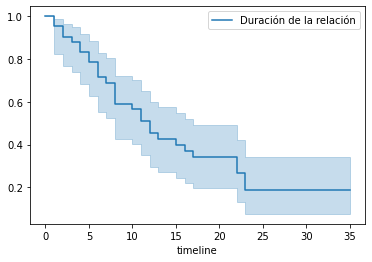

In [7]:
#kmf = km.fit(relacion_fallida['t'], relacion_fallida['estado'])
kmf = KaplanMeierFitter(label="Duración de la relación")
kmf.fit(relacion_fallida['t'], relacion_fallida['estado'])
kmf.plot();

In [10]:
#mediana de la duracion de las relaciones
kmf.median_survival_time_

12.0

In [11]:
kmf.survival_function_

,Duración de la relación
timeline,
0.0,1.000000
1.0,0.952381
2.0,0.904762
3.0,0.880952
4.0,0.833333
5.0,0.785714
6.0,0.714286
7.0,0.689655
8.0,0.591133


In [51]:
kmf.plot_hazard 

<bound method KaplanMeierFitter.plot_hazard of <lifelines.KaplanMeierFitter:"Duración de la relación", fitted with 42 total observations, 12 right-censored observations>>

In [20]:
no_detallistas = relacion_fallida[relacion_fallida['tratamiento']==0] 
detallistas = relacion_fallida[relacion_fallida['tratamiento']==1] 

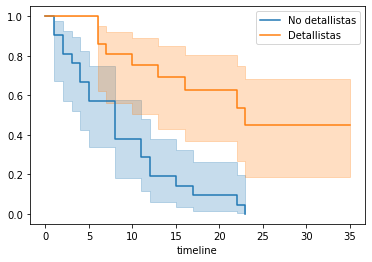

In [19]:
kmf1 = KaplanMeierFitter(label="No detallistas")
kmf1.fit(no_detallistas['t'], no_detallistas['estado'])

kmf2 = KaplanMeierFitter(label="Detallistas")
kmf2.fit(detallistas['t'],detallistas['estado']) 

kmf1.plot();
kmf2.plot();

In [25]:
from lifelines.statistics import logrank_test

results = logrank_test(no_detallistas['t'], detallistas['t'], no_detallistas['estado'], detallistas['estado'])
results.print_summary()

C:\Users\Lenovo\anaconda3\lib\site-packages\lifelines\statistics.py:143: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return self.summary.to_latex()


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          16.79 <0.005     14.55

In [26]:
#Ho: S1(t) = S2(t)
#Ho: S1(t) =| S2(t)
#Se rechaza ya que p<.005

In [28]:
from lifelines import ExponentialFitter

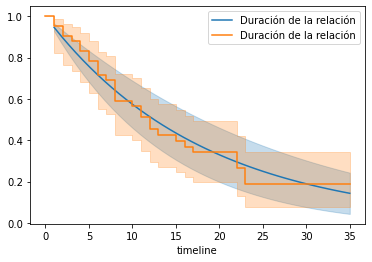

In [33]:
exf = ExponentialFitter(label="Duración de la relación")
exf.fit(relacion_fallida['t'], relacion_fallida['estado'])
exf.plot_survival_function()
kmf.plot();

In [35]:
exf.hazard_

,Duración de la relación
1.000000,0.055453
1.829268,0.055453
2.658537,0.055453
3.487805,0.055453
4.317073,0.055453
5.146341,0.055453
5.975610,0.055453
6.804878,0.055453
7.634146,0.055453
8.463415,0.055453


In [37]:
exf.median_survival_time_

12.499731654744597

In [45]:
from lifelines import WeibullFitter

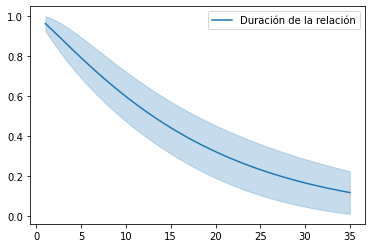

In [48]:
webf = WeibullFitter(label="Duración de la relación")
webf.fit(relacion_fallida['t'], relacion_fallida['estado'])
webf.plot_survival_function();

In [50]:
webf.hazard_

,Duración de la relación
1.000000,0.042445
1.829268,0.046212
2.658537,0.048710
3.487805,0.050609
4.317073,0.052152
5.146341,0.053459
5.975610,0.054595
6.804878,0.055604
7.634146,0.056511
8.463415,0.057338


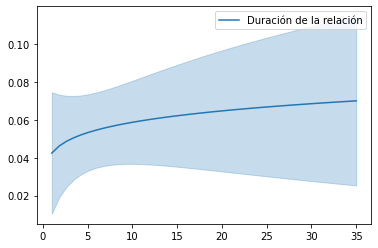

In [54]:
webf.plot_hazard();

In [55]:
from lifelines import LogNormalFitter

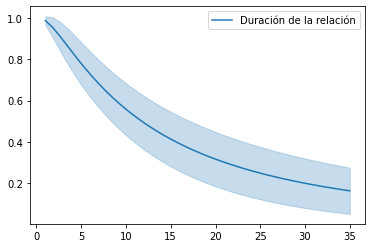

In [57]:
logf = LogNormalFitter(label="Duración de la relación")
logf.fit(relacion_fallida['t'], relacion_fallida['estado'])
logf.plot_survival_function();

In [59]:
logf.hazard_

,Duración de la relación
1.000000,0.031251
1.829268,0.050801
2.658537,0.060715
3.487805,0.065603
4.317073,0.067816
5.146341,0.068544
5.975610,0.068418
6.804878,0.067792
7.634146,0.066873
8.463415,0.065785


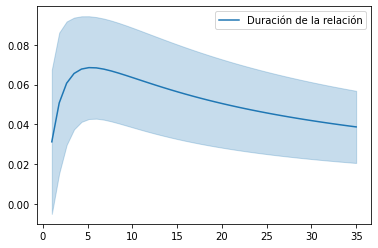

In [61]:
logf.plot_hazard();

In [62]:
logf.median_survival_time_

11.763259674420901